In [ ]:
#INF2178 Technical Assignment 1
#Name: KA YUEN LEE
#Student Number: 1010073974
#Professor: Shion Guha

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
%pip install nhanes
%pip install pingouin
import pingouin as pg
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene
from nhanes.load import load_NHANES_data
import statsmodels.stats.power as smp
from statsmodels.formula.api import mixedlm

df = pd.read_csv("INF2178_A4_data.csv")
df.head(4)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 800.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=6e6de67105244793d2c125a9c1fda74db9260787832661dc8ea38c8ea0e39d58
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.5 MB/s eta 0:00:00


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [10]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        Unnamed: 0       Visit     MR Delay         Age        EDUC  \
count  294.000000  294.000000   294.000000  294.000000  294.000000   
mean   190.421769    1.489796   349.785714   76.411565   14.561224   
std    106.686740    0.500748   400.741520    7.607074    2.884818   
min      0.000000    1.000000     0.000000   60.000000    6.000000   
25%     99.000000    1.000000     0.000000   71.000000   12.000000   
50%    195.500000    1.000000     0.000000   76.000000   14.500000   
75%    282.750000    2.000000   671.500000   81.000000   16.000000   
max    371.000000    2.000000  1707.000000   98.000000   23.000000   

              SES        MMSE         CDR         eTIV        nWBV         ASF  
count  279.000000  293.000000  294.000000   294.000000  294.000000  294.000000  
mean     2.491039   27.259386    0.301020  1478.853741    0.731381    1.203109  
std      1.128008    3.413454    0.381347   176.559755    0.037373    0.139365  
min      1.000000   15.0

In [12]:
# Check for the number of missing values in each column
print(df.isnull().sum())


Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


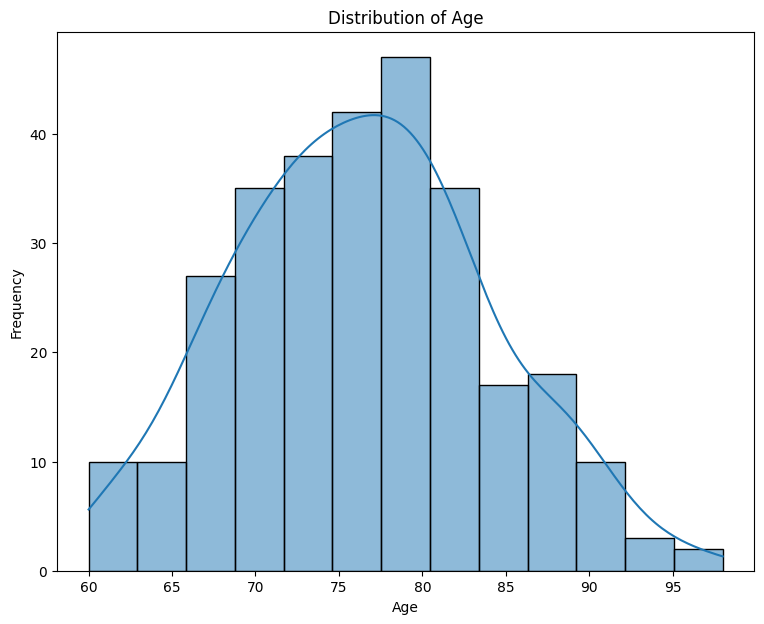

In [13]:
# Showing the distribution of age
plt.figure(figsize=(9, 7))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-a5c3c62354e5>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x="Group", y="eTIV", hue="Visit", dodge=True, markers=["o", "s"],


<Axes: xlabel='Group', ylabel='eTIV'>

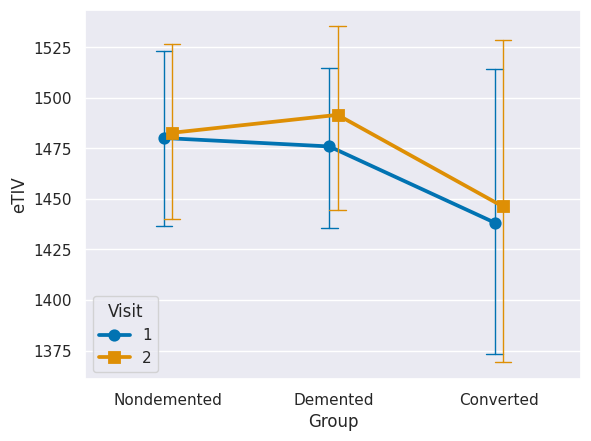

In [14]:
#Research question 1: What is the impact and intervention of dementia on eTIV, among different groups and visit times?

# Create the output plot
sns.set()
sns.pointplot(data=df, x="Group", y="eTIV", hue="Visit", dodge=True, markers=["o", "s"],
	      capsize=.1, errwidth=1, palette="colorblind")

In [15]:
# Perform mixed-effect ANOVA
pg.mixed_anova(data=df, dv="eTIV", between="Group", within="Visit", subject="Subject ID")

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,37424.708356,2,141,18712.354178,0.297278,0.743302,0.004199,NaN
1,Visit,5573.920139,1,141,5573.920139,9.224900,0.002845,0.061407,1.0
2,Interaction,1004.783164,2,141,502.391582,0.831464,0.437535,0.011656,NaN


In [16]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv="eTIV", within="Visit", subject="Subject ID")[-1]

1.0

In [17]:
#test of normality
# Convert 'Group' and 'Visit' columns to strings
df['Group'] = df['Group'].astype(str)
df['Visit'] = df['Visit'].astype(str)

df["group_1"] = df["Group"] + "-" + df["Visit"]
pg.normality(df, dv="eTIV", group = "group_1")

,W,pval,normal
group_1,,,
Nondemented-1,0.968937,0.071927,True
Nondemented-2,0.975840,0.194094,True
Demented-1,0.963033,0.052404,True
Demented-2,0.971023,0.149651,True
Converted-1,0.934993,0.357941,True
Converted-2,0.915798,0.252988,True


In [19]:
# Homogeneity of Variance(Levene's Test)

# For first within group visit = 1
print(pg.homoscedasticity(df[df['Visit'] == "1"], dv="eTIV", group="Group"))

# For second within group visit = 2
print(pg.homoscedasticity(df[df['Visit'] == "2"], dv="eTIV", group="Group"))

               W      pval  equal_var
levene  0.942689  0.391921       True
               W      pval  equal_var
levene  0.405672  0.667304       True


<ipython-input-20-81f8fd513226>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x="Group", y="nWBV", hue="Visit", dodge=True, markers=["o", "s"],


<Axes: xlabel='Group', ylabel='nWBV'>

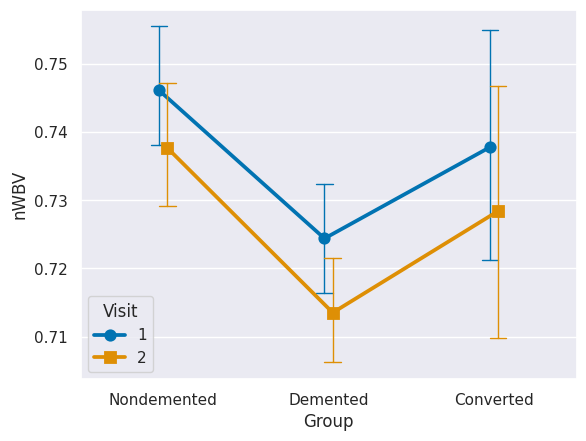

In [20]:
#Research question 2: What is the impact and interaction of dementia on nWBV, among different groups and visit times?

# Create the output plot
sns.set()
sns.pointplot(data=df, x="Group", y="nWBV", hue="Visit", dodge=True, markers=["o", "s"],
	      capsize=.1, errwidth=1, palette="colorblind")


In [21]:
# Perform mixed-effect ANOVA
pg.mixed_anova(data=df, dv="nWBV", between="Group", within="Visit", subject="Subject ID")

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


In [22]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv="nWBV", within="Visit", subject="Subject ID")[-1]

1.0

In [23]:
#test of normality
# Convert 'Group' and 'Visit' columns to strings
df['Group'] = df['Group'].astype(str)
df['Visit'] = df['Visit'].astype(str)

df["group_1"] = df["Group"] + "-" + df["Visit"]
pg.normality(df, dv="nWBV", group = "group_1")

,W,pval,normal
group_1,,,
Nondemented-1,0.988723,0.771999,True
Nondemented-2,0.983956,0.510883,True
Demented-1,0.992007,0.954626,True
Demented-2,0.979475,0.384691,True
Converted-1,0.933507,0.341468,True
Converted-2,0.940329,0.502351,True


In [24]:
# Homogeneity of Variance(Levene's Test)

# For first within group visit = 1
print(pg.homoscedasticity(df[df['Visit'] == "1"], dv="nWBV", group="Group"))

# For second within group visit = 2
print(pg.homoscedasticity(df[df['Visit'] == "2"], dv="nWBV", group="Group"))

               W     pval  equal_var
levene  1.045199  0.35422       True
               W      pval  equal_var
levene  0.298582  0.742338       True


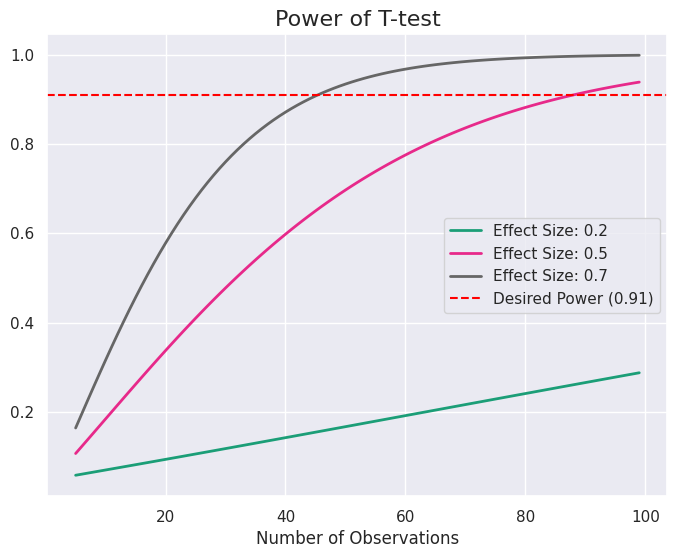

In [25]:
from statsmodels.stats.power import TTestIndPower

# Given effect size
effect_sizes = np.array([0.2, 0.5, 0.7])
# Significance level
alpha = 0.05
# Desired power
power = 0.91

analysis = TTestIndPower()

# Plot power analysis
fig, ax = plt.subplots(figsize=(8, 6))
analysis.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=effect_sizes, alpha=alpha, ax=ax)
ax.set_title('Power of T-test', fontsize = 16)
ax.axhline(power, color='red', linestyle='--')
ax.legend([f'Effect Size: {i}' for i in effect_sizes] + ['Desired Power (0.91)'])

plt.show()